In [1]:
%matplotlib inline
import mysql.connector as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
con = sql.connect(database='kickstarter2017', user='kickstarter', password='kickstarter')

In [3]:
pd.read_sql("""
SELECT * FROM kickstarter2017.kickstarter_project LIMIT 5;
""", con)

,project_id,url,name,status,project_we_love,category_id,subcategory_id,creators_url,location_id,pledged,...,description_short,description_full,video_url,image_url,faq_count,updates_count,comments_count,fb_comments_count,fb_shares_count,project_data
0,1,https://www.kickstarter.com/projects/tragoe/ke...,Kenophania: How A Song Is Created (Interactive...,live,0,1,1,https://www.kickstarter.com/projects/tragoe/ke...,1,38.57,...,A new music experience: be a part of writing a...,"<div class=""template asset"" contenteditable=""f...",https://ksr-video.imgix.net/projects/3097491/v...,,0,0,0,0,0,"{""id"":1010207468,""photo"":{""key"":""assets/018/75..."
1,2,https://www.kickstarter.com/projects/270983716...,RABBITS Podcast,live,0,1,1,https://www.kickstarter.com/projects/270983716...,2,9113.00,...,"Wanted: lovers of mystery, games, and intrigue...","<div class=""template oembed"" contenteditable=""...",,https://ksr-ugc.imgix.net/assets/017/200/961/c...,0,0,10,0,1198,"{""id"":1787738795,""photo"":{""key"":""assets/017/20..."
2,3,https://www.kickstarter.com/projects/myterochm...,Myter &amp; Mysterier: Bibeln,live,0,1,1,https://www.kickstarter.com/projects/myterochm...,3,93190.00,...,The Bible as you&#39;ve never met it before. A...,<p><i>(For English translation of the Story an...,https://ksr-video.imgix.net/projects/3158094/v...,,0,1,1,0,573,"{""id"":409994938,""photo"":{""key"":""assets/018/925..."
3,4,https://www.kickstarter.com/projects/eventraid...,Event Raiders Podcast Episode 1,live,0,1,1,https://www.kickstarter.com/projects/eventraid...,4,235.00,...,Looking to launch a podcast that provides in d...,"<p>Our business, Event Raiders, specializes in...",,https://ksr-ugc.imgix.net/assets/018/809/797/f...,0,0,0,0,4,"{""id"":1117812892,""photo"":{""key"":""assets/018/80..."
4,5,https://www.kickstarter.com/projects/102699665...,Culture Club (émission radio Dijon),live,0,1,1,https://www.kickstarter.com/projects/102699665...,5,0.00,...,Après 3 saisons chez Radio Cultures Dijon notr...,<p><b>Culture Club</b> est une émission dédiée...,,https://ksr-ugc.imgix.net/assets/018/620/234/e...,0,0,0,0,10,"{""id"":1770254002,""photo"":{""key"":""assets/018/62..."


## total count of projects

In [4]:
pd.read_sql("""
SELECT count(*) as projects_count FROM kickstarter2017.kickstarter_project;
""", con)

,projects_count
0,117024


## count of projects by status

In [5]:
pd.read_sql("""
SELECT status, count(*) as projects_count FROM kickstarter2017.kickstarter_project GROUP BY status;
""", con)

,status,projects_count
0,,3
1,canceled,5633
2,failed,55016
3,live,2584
4,successful,53401
5,suspended,387


## count of projects by staff pick

In [6]:
pd.read_sql("""
select project_we_love, count(*) as projects_count FROM kickstarter2017.kickstarter_project GROUP BY project_we_love;
""", con)

,project_we_love,projects_count
0,0,103668
1,1,13356


## success by staff pick - how to take into account (feature extraction)? ? ?
only 15% of picked fail 

In [7]:
pd.read_sql("""
SELECT project_we_love, status, count(*) as projects_count FROM kickstarter2017.kickstarter_project 
where status like 'failed' or status like 'successful'
GROUP BY project_we_love, status order by 1, 2;
""", con)

,project_we_love,status,projects_count
0,0,failed,53021
1,0,successful,42465
2,1,failed,1995
3,1,successful,10936


## count of projects by category
category **games** is missing

In [8]:
pd.read_sql("""
SELECT cat.name, count(*) as projects_count FROM kickstarter2017.kickstarter_project p
join kickstarter_category cat on p.category_id = cat.category_id
where status like 'failed' or status like 'successful'
GROUP BY 1
""", con)

,name,projects_count
0,Art,16170
1,Comics,5004
2,Crafts,3228
3,Dance,1324
4,Design,4952
5,Fashion,1672
6,Film & Video,7146
7,Food,9994
8,Journalism,2549
9,Music,22660


## success by category - stacked bar chart vs success rate ? ? ?

In [9]:
pd.read_sql("""
select cat.name, p.status, p.projects_count from
(SELECT category_id, status, count(*) as projects_count FROM kickstarter2017.kickstarter_project
where status like 'failed' or status like 'successful'
GROUP BY category_id, status) as p
join kickstarter_category cat on p.category_id = cat.category_id
order by 1,2;
""", con)

,name,status,projects_count
0,Art,failed,8241
1,Art,successful,7929
2,Comics,failed,1810
3,Comics,successful,3194
4,Crafts,failed,2321
5,Crafts,successful,907
6,Dance,failed,550
7,Dance,successful,774
8,Design,failed,1914
9,Design,successful,3038


## count of projects by subcategory
some subcategories are missing (154 - 115 = 39)

In [10]:
pd.read_sql("""
SELECT subcat.name, count(*) as projects_count FROM kickstarter2017.kickstarter_project p
join kickstarter_subcategory subcat on p.subcategory_id = subcat.subcategory_id
where status like 'failed' or status like 'successful'
GROUP BY 1
""", con)

,name,projects_count
0,3D Printing,557
1,Academic,752
2,Accessories,1672
3,Animals,226
4,Anthologies,702
5,Apps,2269
6,Architecture,625
7,Art Books,2363
8,Audio,354
9,Bacon,178


## success by subcategory - relevant ? ? ?
some has 100% success rate

## location - success rate ? ? ?
many unique locations

In [11]:
pd.read_sql("""
SELECT count(distinct location_id) as unique_locations FROM kickstarter2017.kickstarter_project 
where status like 'failed' or status like 'successful';
""", con)

,unique_locations
0,11356


## goal distribution

In [12]:
df = pd.read_sql("""
select goal, status FROM kickstarter2017.kickstarter_project where status like 'successful' or status like 'failed';
""", con)

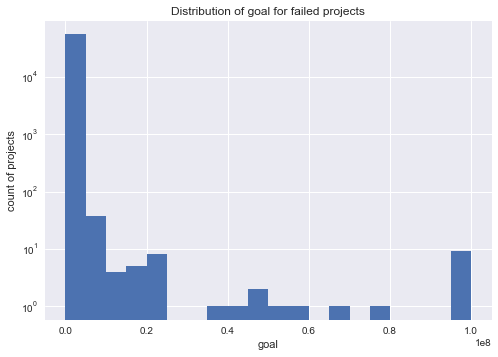

In [13]:
df[df['status'] == 'failed'].hist(bins=20)
plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('goal')
plt.title('Distribution of goal for failed projects')

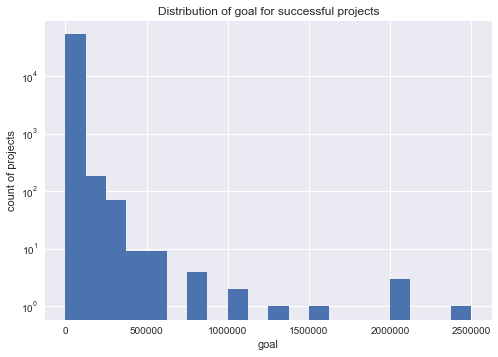

In [14]:
df[df['status'] == 'successful'].hist(bins=20)
plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('goal')
plt.title('Distribution of goal for successful projects')

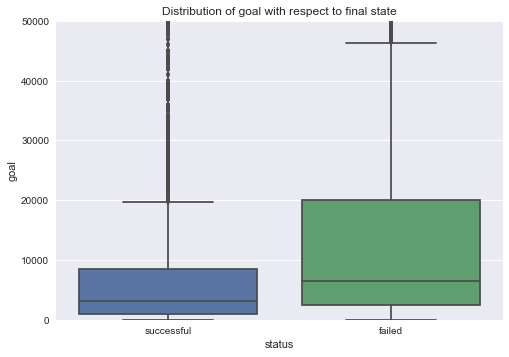

In [15]:
sns.boxplot(data=df, x='status', y='goal')
#plt.yscale('log')
plt.ylim([-10, 50000])
plt.title('Distribution of goal with respect to final state')

## pledged distribution

In [16]:
df = pd.read_sql("""
select pledged, status FROM kickstarter2017.kickstarter_project where status like 'successful' or status like 'failed';
""", con)

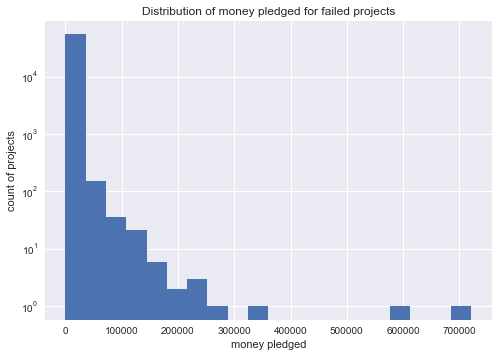

In [17]:
df[df['status'] == 'failed'].hist(bins=20)
plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('money pledged')
plt.title('Distribution of money pledged for failed projects')

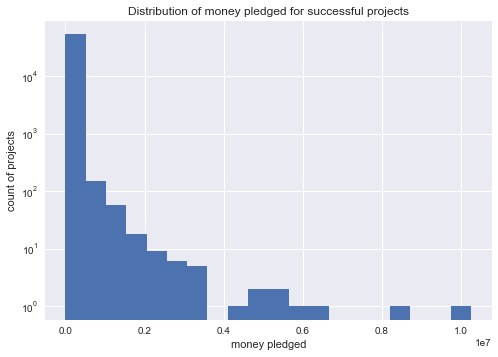

In [18]:
df[df['status'] == 'successful'].hist(bins=20)
plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('money pledged')
plt.title('Distribution of money pledged for successful projects')

Compare to goal

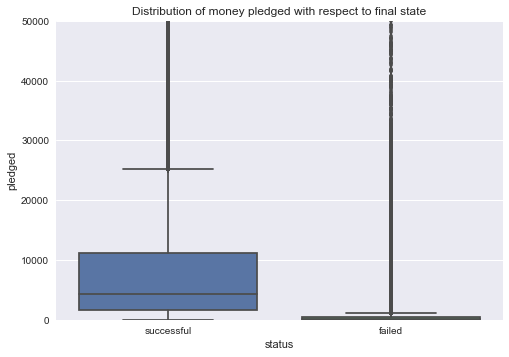

In [19]:
sns.boxplot(data=df, x='status', y='pledged')
#plt.yscale('log')
plt.ylim([-10, 50000])
plt.title('Distribution of money pledged with respect to final state')

## pledged/goal ratio - ? ? ?
* some projects have small goal (f.e. 1 USD) - therefore ratio can be extremely high

* makes **keep-it-all** from **all-or-nothing**

In [20]:
df = pd.read_sql("""
select name, pledged/goal, pledged, goal, status FROM kickstarter2017.kickstarter_project where status like 'successful' or status like 'failed';
""", con)

In [21]:
df.sort_values('pledged/goal', ascending=False).head()

,name,pledged/goal,pledged,goal,status
73639,CLOCKWRIGHT: Large-Scale Analogue Time Machines,27588.0,27588.0,1.0,successful
37503,"Penny Arcade&#39;s Podcast, &quot;Downloadable...",23036.0,230360.0,10.0,successful
47201,THE &#39;mi8&#39; RISES | The Best Wireless Du...,22603.0,22603.0,1.0,successful
81854,"Multi-Purpose, All-Occasion Greeting Cards",12575.0,25150.0,2.0,successful
42802,"Arduino IoT. Home automation, 3D printing, rob...",9605.0,9605.0,1.0,successful


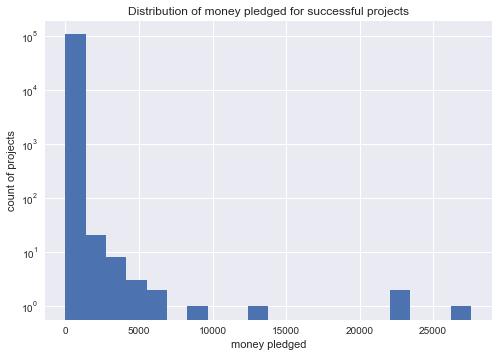

In [22]:
df['pledged/goal'].hist(bins=20)
plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('money pledged')
plt.title('Distribution of money pledged for successful projects')

In [23]:
# only 1 NaN value
df[df['goal'] == 0]

,name,pledged/goal,pledged,goal,status
59202,LOVELAND Round 6: A Force More Powerful,NaN,100.0,0.0,successful


In [24]:
df.dropna(inplace=True)

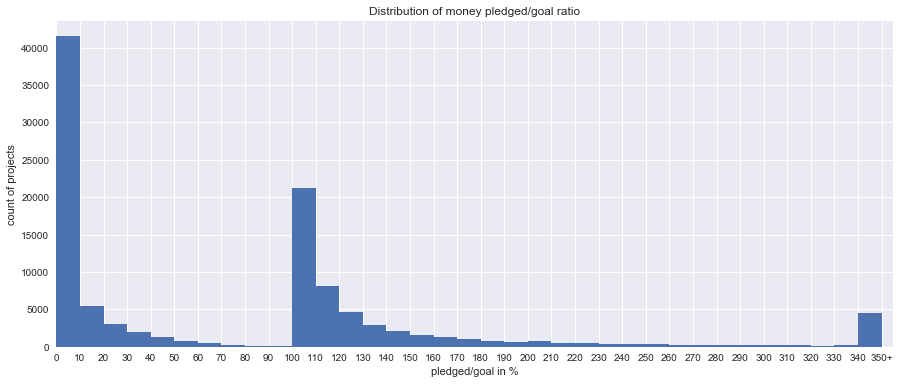

In [25]:
bins = np.arange(0,355,10)

fig, ax = plt.subplots(figsize=(15,6))
_, bins, patches = plt.hist(np.clip(df['pledged/goal']*100, bins[0], bins[-1]), bins=bins)

labels = [str(x) for x in np.arange(0,355,10)]
labels[-1] = labels[-1] + '+'

plt.xticks(np.arange(0,355,10), labels, rotation='horizontal')
plt.xlim([0, 355])
#plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('pledged/goal in %')
plt.title('Distribution of money pledged/goal ratio')

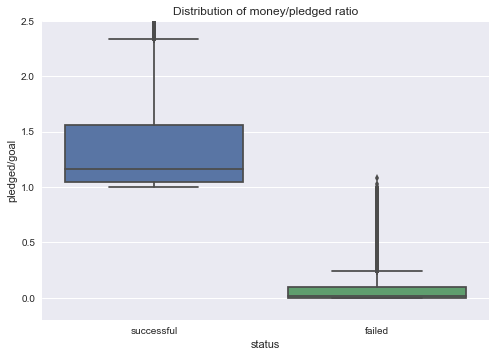

In [26]:
sns.boxplot(data=df, x='status', y='pledged/goal')
#plt.yscale('log')
plt.ylim([-0.20, 2.50])
plt.title('Distribution of money/pledged ratio')

## count of projects by currency

In [27]:
pd.read_sql("""
SELECT currency, count(*) FROM kickstarter2017.kickstarter_project group by 1;
""", con)

,currency,count(*)
0,,3
1,$,44136
2,AU$,729
3,aud,1655
4,CA$,1664
5,cad,3107
6,chf,235
7,DKK,393
8,eur,3940
9,gbp,5848


## success by currency - ? ? ?
same currency - different symbols

In [28]:
pd.read_sql("""
SELECT currency, status, count(*) as projects_count FROM kickstarter2017.kickstarter_project 
where status like 'failed' or status like 'successful'
GROUP BY currency, status order by 1, 2;
""", con)

,currency,status,projects_count
0,$,successful,44136
1,AU$,successful,729
2,aud,failed,1408
3,CA$,successful,1664
4,cad,failed,2621
5,chf,failed,117
6,CHF,successful,73
7,dkk,failed,214
8,DKK,successful,137
9,eur,failed,3179


## backers distribution

In [29]:
df = pd.read_sql("""
select backers_count, status, name FROM kickstarter2017.kickstarter_project where status like 'successful' or status like 'failed';
""", con)

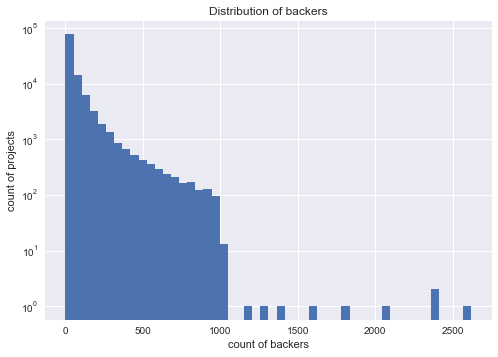

In [30]:
df.hist(bins=50)
plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('count of backers')
plt.title('Distribution of backers')

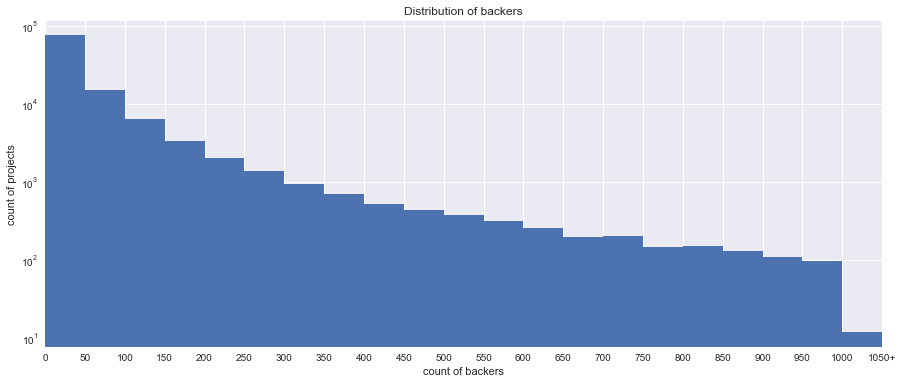

In [31]:
bins = np.arange(0,1100,50)

fig, ax = plt.subplots(figsize=(15,6))
_, bins, patches = plt.hist(np.clip(df['backers_count'], bins[0], bins[-1]), bins=bins)

labels = [str(x) for x in np.arange(0,1100,50)]
labels[-1] = labels[-1] + '+'

plt.xticks(np.arange(0,1100,50), labels, rotation='horizontal')
plt.xlim([0, 1050])
plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('count of backers')
plt.title('Distribution of backers')

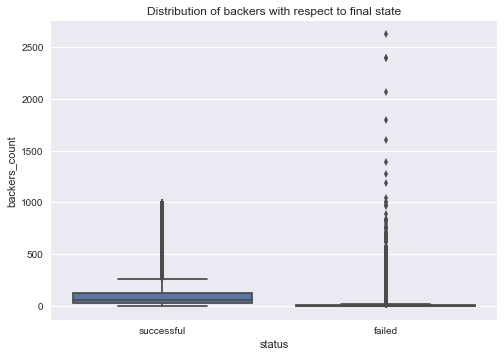

In [32]:
sns.boxplot(data=df, x='status', y='backers_count')
#plt.yscale('log')
#plt.ylim([-10, 300])
plt.title('Distribution of backers with respect to final state')

In [33]:
df.sort_values(by='backers_count',ascending=False).head(10)

,backers_count,status,name
45113,2620,failed,Sideclick: Streamline Your Streaming Experience
51919,2391,failed,MAGZET: The Audio Jack Reinvented with the Pow...
47566,2388,failed,Kickstarter Open Source Death Star
42409,2062,failed,CENTR: Interactive Panoramic Video in the Palm...
2246,1792,failed,"Support a 100% people-funded, nonpartisan onli..."
47527,1601,failed,Spark: Upgrade your lights with Wi-Fi and apps
48340,1391,failed,Turn Your Phone Into Work Computer and Family ...
47715,1274,failed,CAT: A Thruster for Interplanetary CubeSats
47726,1188,failed,The Greatest Toy KIT in the Universe! Spider T...
52319,1045,failed,Moonspike | We&#39;re Going Back to the Moon


## duration distribution - ? ? ?
* some old projects - duration > 60 (nowadays 60 is max.)
* analysing events (comments, updates, ...) over time for all projects OR projects with 30 days duration?

In [34]:
df = pd.read_sql("""
select duration, status, name FROM kickstarter2017.kickstarter_project where status like 'successful' or status like 'failed';
""", con)

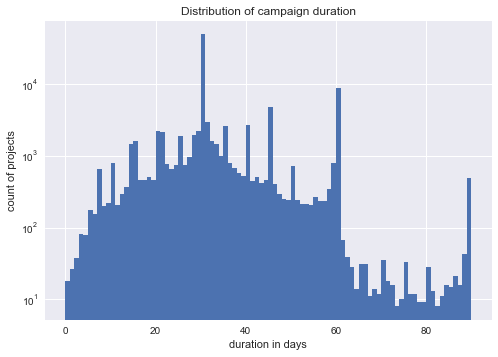

In [35]:
df['duration'].hist(bins=90)
plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('duration in days')
plt.title('Distribution of campaign duration')

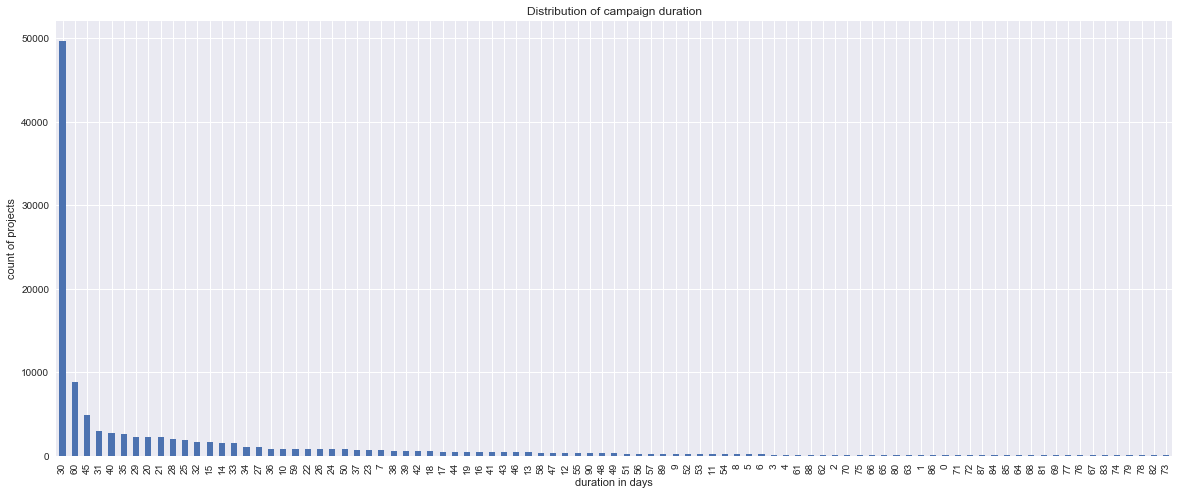

In [36]:
plt.rcParams['figure.figsize'] = [20, 8]
df['duration'].value_counts().plot(kind='bar')
#plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('duration in days')
plt.title('Distribution of campaign duration')

# TODO time-dependent trends
- ends at week/-end
- month

Does success rate change?

# TODO impact of faq, updates, comments, rewards, fb_shares, ... on success
## Separate meta and end-collected data

In [ ]:
pd.read_sql("""

""", con)

In [ ]:
pd.read_sql("""

""", con)